## Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalization costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age, bmi, no of dependents, smoker, region, medical insurance is calculated.

### Columns

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/$m^{2}$) using the ratio of height to weight, ideally 18.5 to 24.9.
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

### Predict

Can you accurately predict insurance costs?

## Dataset Link

https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here, 'age', 'bmi', 'charges' are numerical and continuous data, while 'sex', 'children', 'smoker', and 'region' are categorical data.<br>
The out out variable is 'charges', which is continuous, so we need to perform regression.

### Exploratory Data Analysis

In [3]:
# Getting dimensions od the dataset
df.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns. 6 out of the 7 columns are input or independent variables and 1 is the output or target variable.

In [4]:
# Getting the column names
df.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

The independent variables are:<br>
'age', 'sex', 'bmi', 'children', 'smoker', 'region'<br>

The target variable is:<br>
'charges'

In [5]:
# Checking datatype of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The datatypes present in the dataset are int64, float64 and object as expected.

In [6]:
# Checking for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no NaN or na values in the dataset which implies there are no missing values.

In [7]:
# Checking for duplicates
df.duplicated().sum()

1

There is one duplicate row, which needs to be removed.

In [8]:
#Removing duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.shape

(1337, 7)

After removing duplicates, the number of rows is now 1337.

In [10]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


This provides an overview of the dataset. From here, we can see that there are no missing values and also the datatypes of the variables.

In [11]:
# Number of unique values for each variable
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

From the number of unique values, it is clear that sex, smoker and region are categorical variables.<br>

The output variable (charges) has all unique values.

In [12]:
# Frequency of occurence of each value in 'sex' column
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

Both sexes are almost equally represented.

In [13]:
# Frequency of occurence of each value in 'smoker' column
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

The number of smokers is very less compared to the number of non-smokers.

In [14]:
# Frequency of occurence of each value in 'region' column
df.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

All regions are almost equally represented.

In [15]:
# Frequency of occurence of each value in 'children' column
df.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Most of the insurers do not have any children/dependent added to their insurance.

####  Dataset Description

In [16]:
# Statistical summary of numerical columns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Observations from the above description:<br>
- There are no missing values in any of the columns as the count is same for all.
- The mean is very close to the median, except for 'children' and 'charges' column. This means there is no skewness observed in these variables.
- For 'charges' column, the mean is greater than the median, which means it is skewed to the right. So is the 'children' column.

#### Data Visualisation

In [17]:
sns.set_palette(sns.color_palette("Set2"))

male      675
female    662
Name: sex, dtype: int64


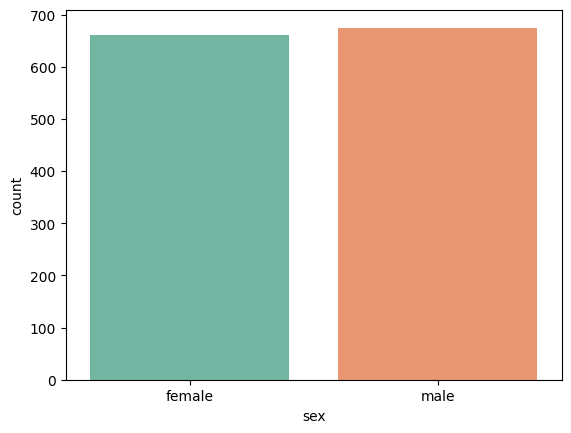

In [18]:
# Visualising the sex distribution
print(df.sex.value_counts())
sns.countplot(x=df.sex)
plt.show()

no     1063
yes     274
Name: smoker, dtype: int64


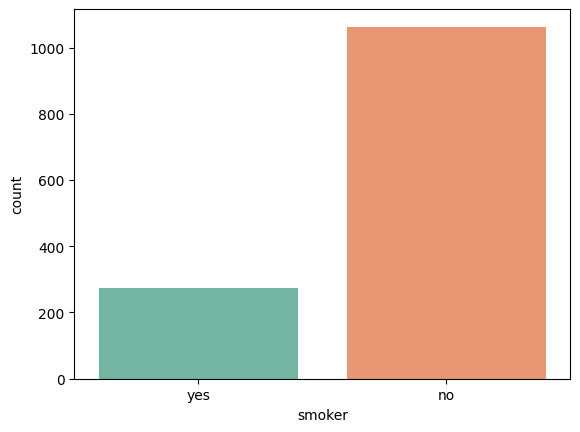

In [19]:
# Visualising the smoker distribution
print(df.smoker.value_counts())
sns.countplot(x=df.smoker)
plt.show()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


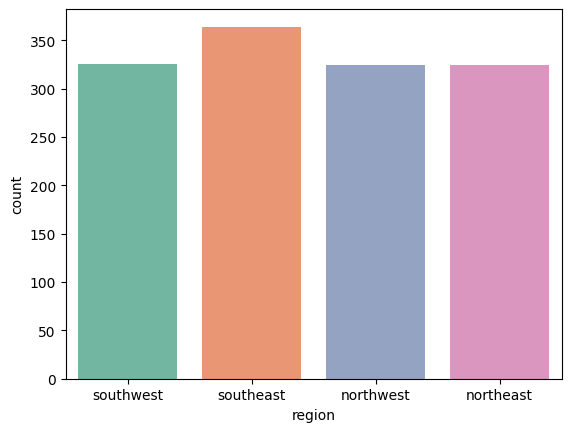

In [20]:
# Visualising the region distribution
print(df.region.value_counts())
sns.countplot(x=df.region)
plt.show()

In [21]:
# Mean charges for each sex

mean_charges_by_sex = df[['sex', 'charges']].groupby('sex', as_index = False).mean()
mean_charges_by_sex

,sex,charges
0,female,12569.578844
1,male,13974.998864


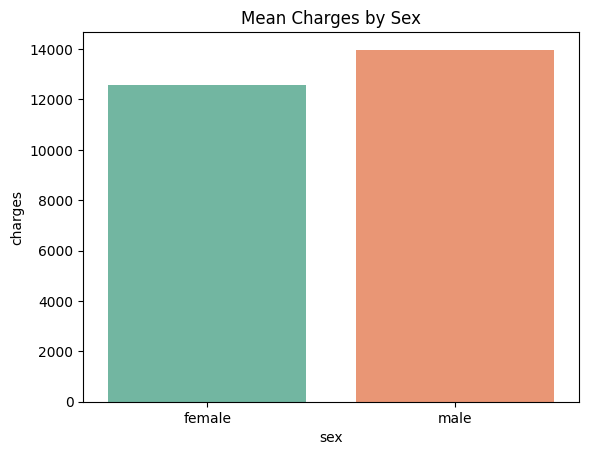

In [22]:
# Visualising the mean charges by sex

sns.barplot(x=mean_charges_by_sex['sex'], y=mean_charges_by_sex['charges'])
plt.title('Mean Charges by Sex')
plt.show()

The mean charges for males is slightly higher than the mean charges for females.

In [23]:
# Mean charges for smoker

mean_charges_smoker= df[['smoker', 'charges']].groupby('smoker', as_index = False).mean()
mean_charges_smoker

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


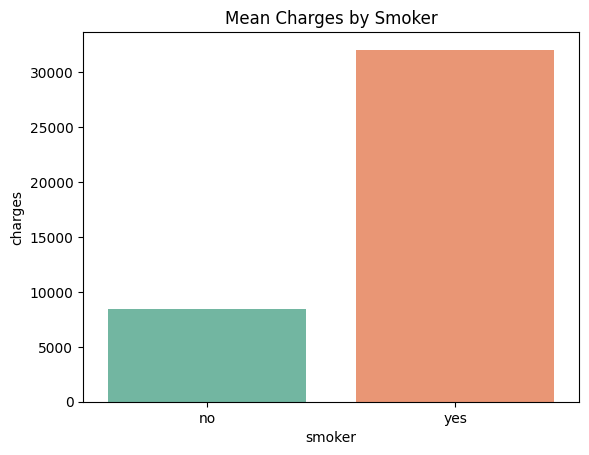

In [24]:
# Visualising the mean charges by smoker

sns.barplot(x=mean_charges_smoker['smoker'], y=mean_charges_smoker['charges'])
plt.title('Mean Charges by Smoker')
plt.show()

The mean charges are higher for smokers than for non-smokers as is evident from the graph.

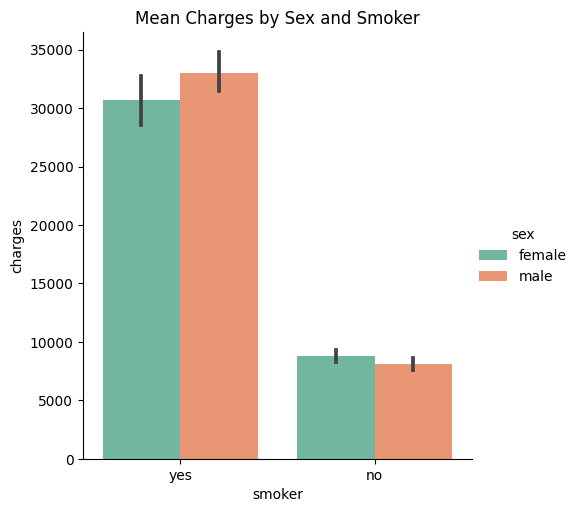

In [25]:
sns.catplot(data=df, x='smoker', y='charges', hue='sex', kind='bar')
plt.title('Mean Charges by Sex and Smoker')
plt.show()

From the above plot, we can observe that there are more males who smoke than females. Since, we have already discovered that the mean charges for smokers are higher than the mean charges of non-smokers, we can say that the mean charges for males is higher because they are smokers.

In [26]:
# Mean charges for each region

mean_charges_region= df[['region', 'charges']].groupby('region', as_index = False).mean()
mean_charges_region

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


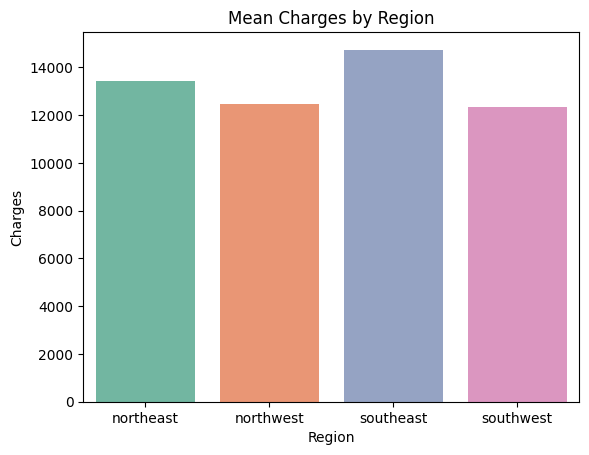

In [27]:
# Visualising the mean charges by region

sns.barplot(x=mean_charges_region['region'], y=mean_charges_region['charges'])
plt.title('Mean Charges by Region')
plt.ylabel('Charges', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.show()

The mean charges in the southeast and northeast are higher compared to the northwest and southwest.

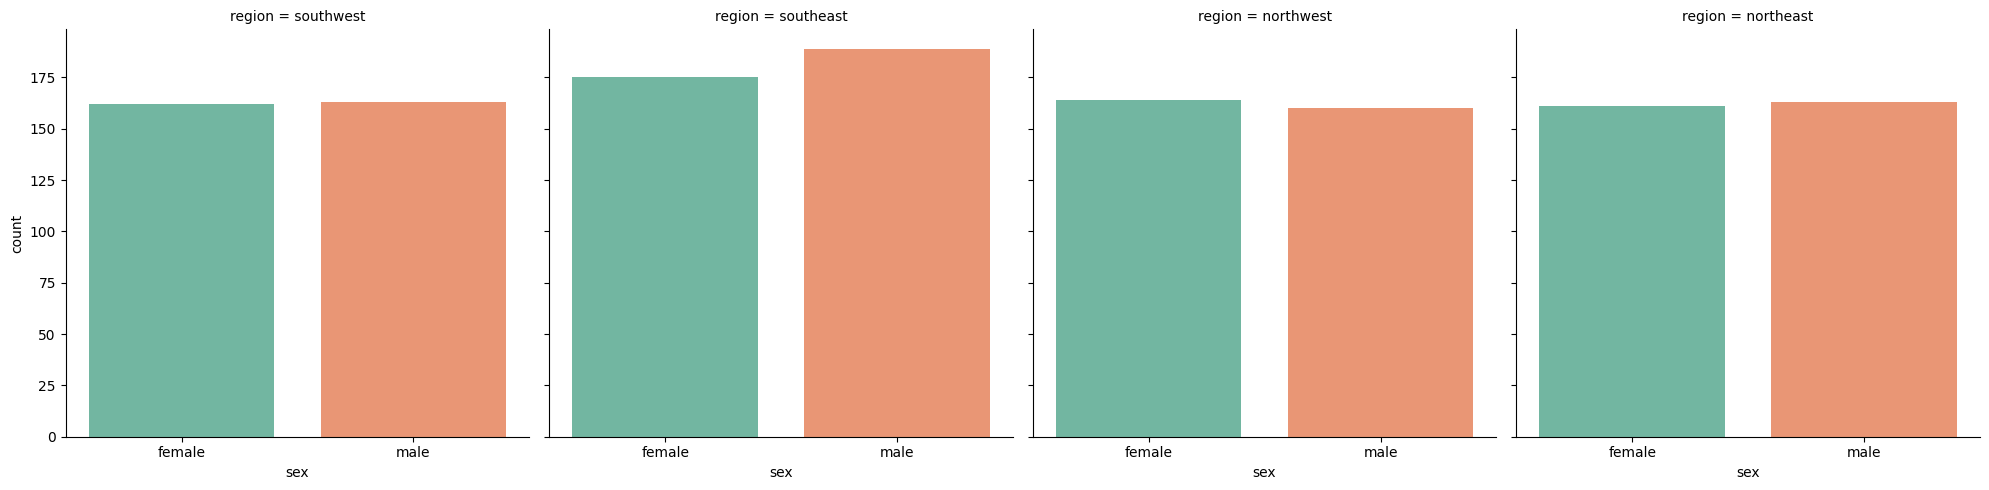

In [28]:
# Count of each sex in each region

sns.catplot(data=df, x='sex', col='region', kind='count')
plt.show()

The proportion of males and females is almost the same in all regions except the 'southeast'. From the graphs we can see that the 'southeast' has more male insurers, which explains the higher mean charges in that region.

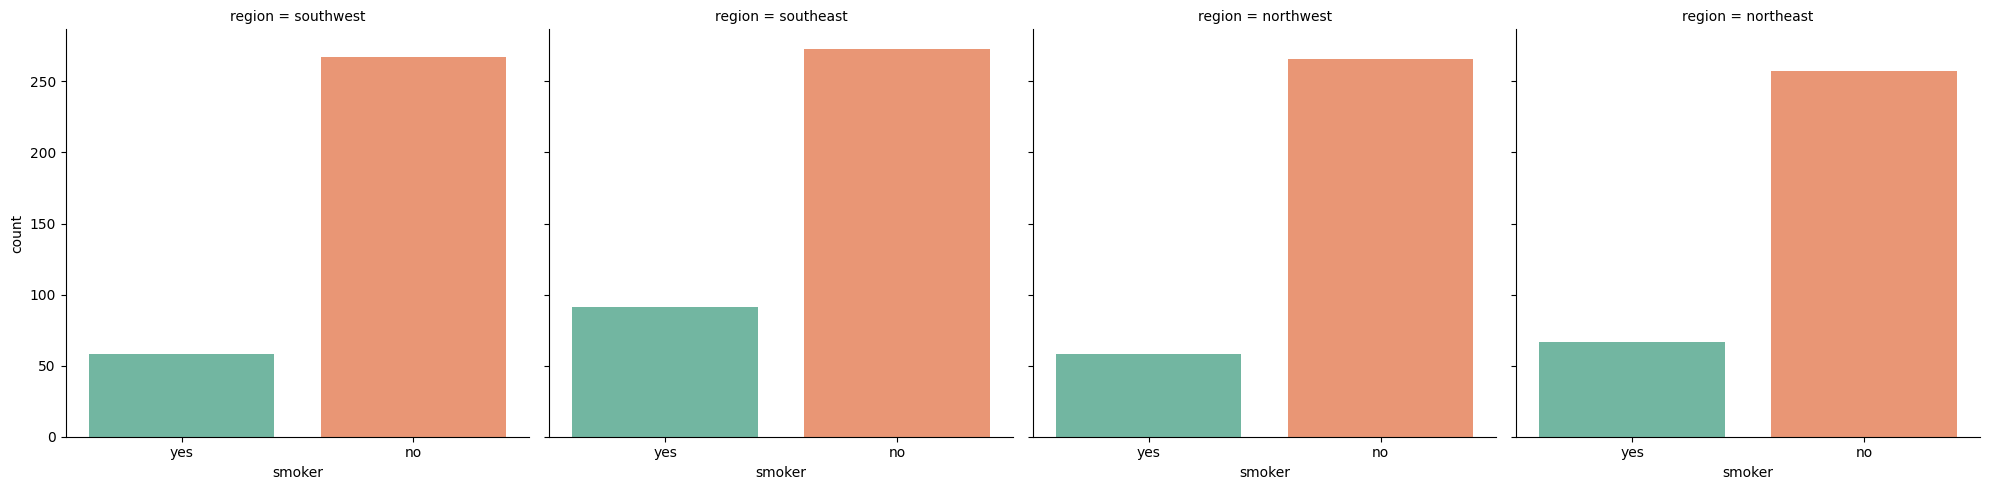

In [29]:
# Count of each smokers in each region

sns.catplot(data=df, x='smoker', col='region', kind='count')
plt.show()

Again, there are more smokers in the 'southeast' region compared to the other regions. This is quite plausible as there are more males in that region. This also explains the higher mean charges in 'southeast' region.

In [30]:
# Storing the numerical input data in a different dataframe
num_cols = df[['age', 'bmi', 'children', 'charges']]

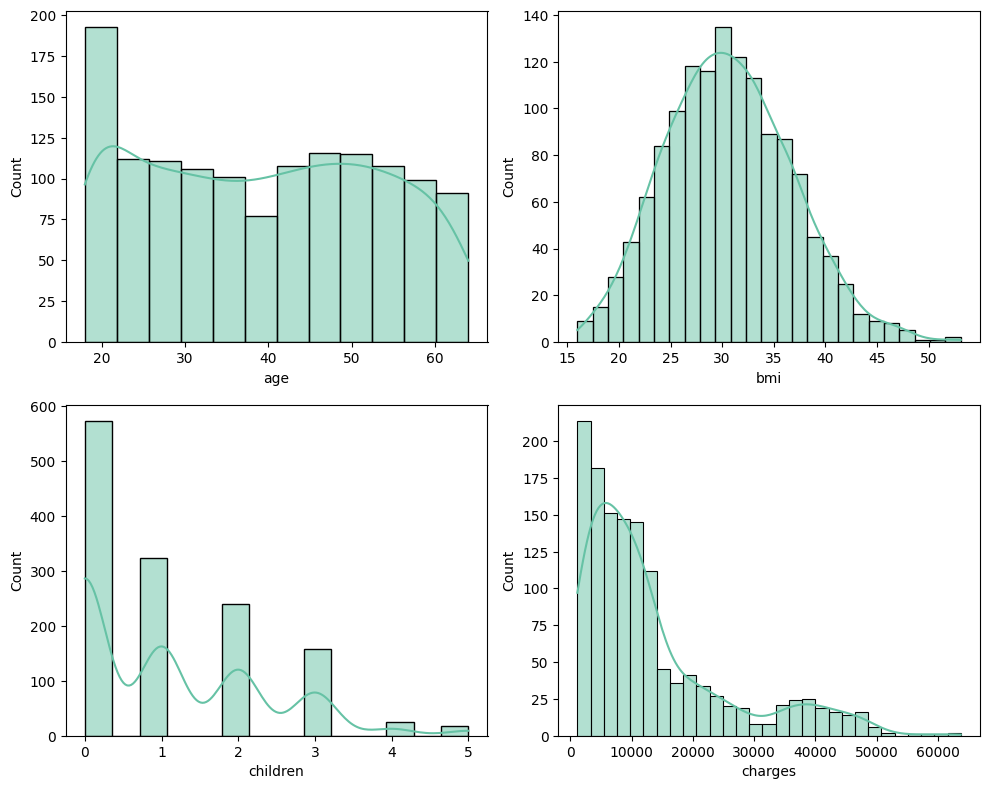

In [31]:
# Data distribution for numerical columns
plt.figure(figsize=(10, 8))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(2, 2, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

As observed from the statistical description of the dataset, there is almost no skewness in the distribution of 'age', and 'bmi'.

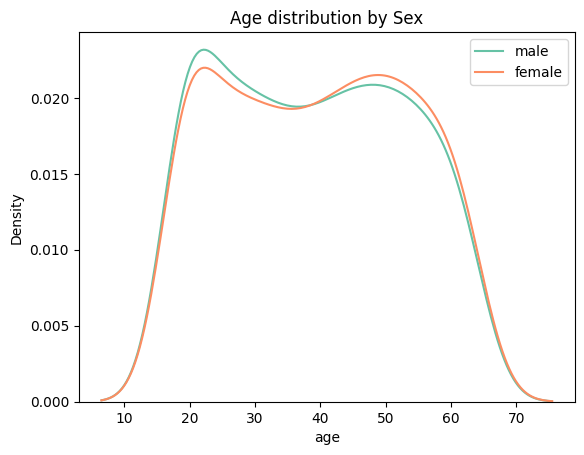

In [32]:
# Distribution of age by sex
sns.kdeplot(df['age'][df['sex'] == 'male'], label='male')
sns.kdeplot(df['age'][df['sex'] == 'female'], label='female')
plt.legend()
plt.title('Age distribution by Sex')
plt.show()

For age around the 20s, there are more males than females, while for age between 40 - 60, there are more females than males.

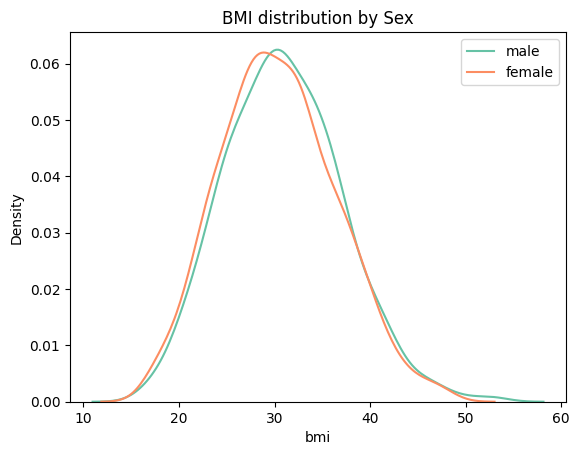

In [33]:
# Distribution of bmi by sex
sns.kdeplot(df['bmi'][df['sex'] == 'male'], label='male')
sns.kdeplot(df['bmi'][df['sex'] == 'female'], label='female')
plt.legend()
plt.title('BMI distribution by Sex')
plt.show()

For females, bmi slightly lower than 30 is most common, while for males it is 30 or slightly higher.

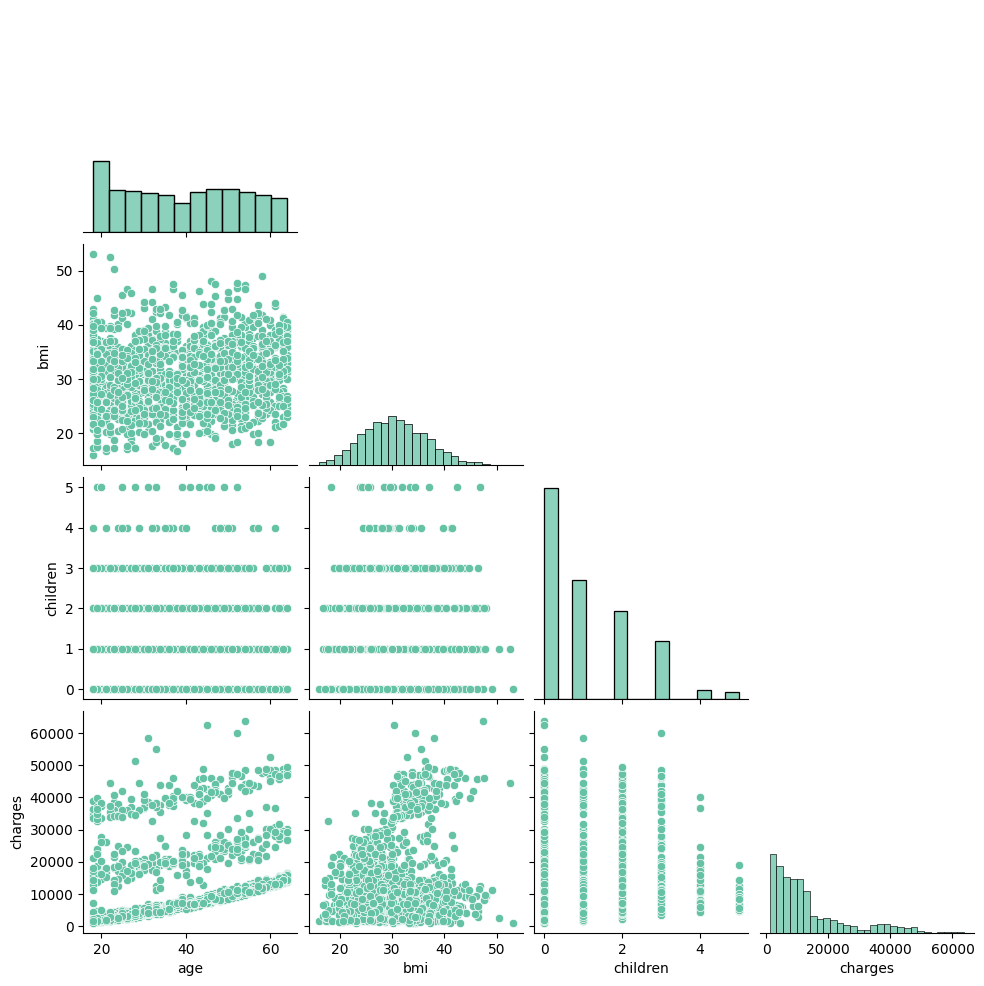

In [34]:
sns.pairplot(data=df, corner = True)
plt.show()

The pairplot shows that although the charges have a positive linear relationship with the other attributes, the relationship is very weak.

### Checking for outliers

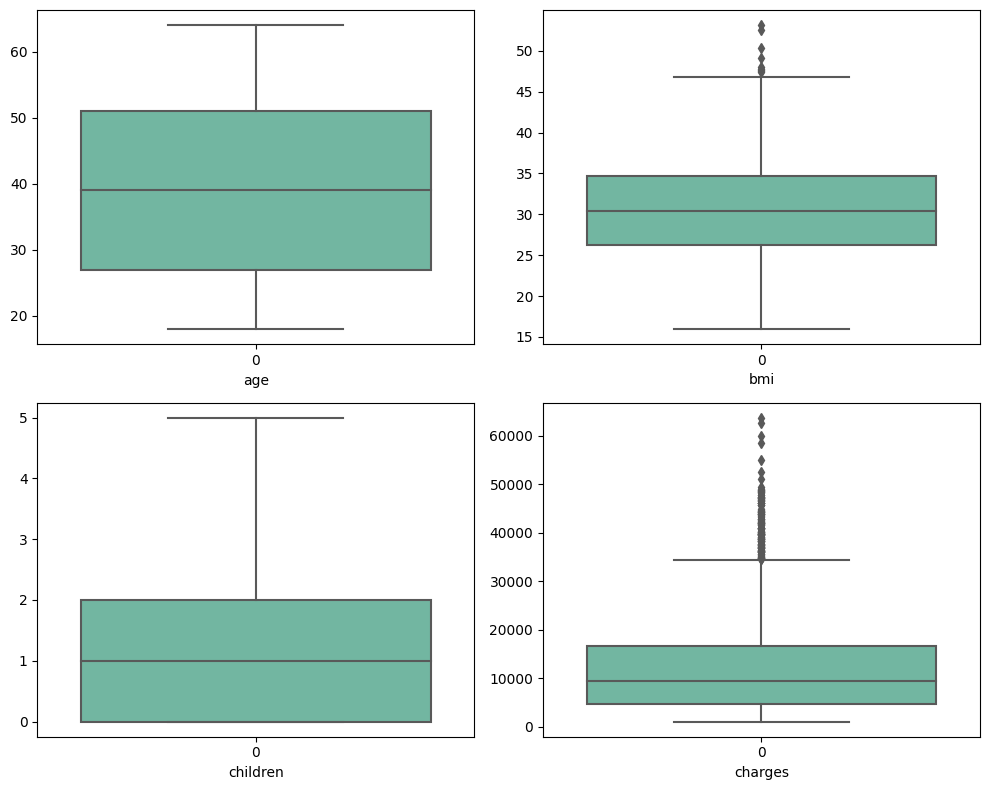

In [35]:
# Checking for outliers using boxplot
plt.figure(figsize=(10, 8))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(2, 2, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

From the boxplots we can find that there are a few outliers in 'bmi' column as well as 'charges' column.<br>
But the values observed as outliers are still plausible values, so we may proceed without removing the outliers to avoid losing valuable data.

### Checking for skewness

In [36]:
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

There is slight skewness in 'children' and 'charges' column, as seen before. Since, 'charges' is the target column, we will not remove the skewness. For 'children' column we need to remove the skewness.

In [37]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [38]:
# Removing skewness

transformed_log = np.log(df['children'])                        # Log Transformation
transformed_boxcox = special.boxcox1p(df['children'], 0.15)     # Box-Cox Transformation with lambda=0.15
transformed_inverse = 1 / df['children']                        # Inverse Transformation
transformed_yeojohnson, _ = stats.yeojohnson(df['children'])    # Yeo-Johnson Transformation
transformed_cbrt = np.cbrt(df['children'])                      # Cube Root Transformation

# Creating a dictionary for the skewness values of each transformation
transformed_skew = {
    "Log Transformation": stats.skew(transformed_log),
    "Box-Cox Transformation": stats.skew(transformed_boxcox),
    "Inverse Transformation": stats.skew(transformed_inverse),
    "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
    "Cube Root Transformation": stats.skew(transformed_cbrt)
}

transformed_skew

{'Log Transformation': nan,
 'Box-Cox Transformation': 0.3402219240717114,
 'Inverse Transformation': nan,
 'Yeo Johnson Transformation': 0.10449435836607433,
 'Cube Root Transformation': -0.09857086866541667}

In [39]:
# Using cuberoot transformation
df['children'] = np.cbrt(df['children'])

In [40]:
df.skew()

age         0.054781
bmi         0.283914
children   -0.098682
charges     1.515391
dtype: float64

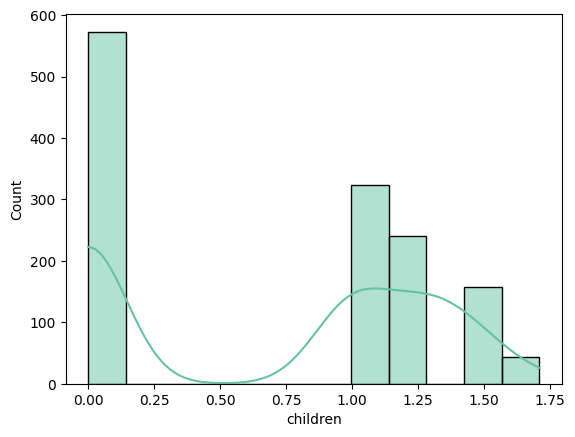

In [41]:
sns.histplot(df['children'], kde=True)
plt.xlabel('children', fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.show()

Now, the skewness is reduced.

### Correlation analysis

In [42]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.047775,0.298308
bmi,0.109344,1.000000,0.016512,0.198401
children,0.047775,0.016512,1.000000,0.072012
charges,0.298308,0.198401,0.072012,1.000000


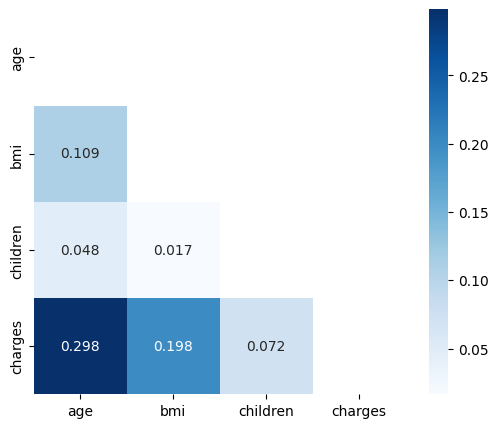

In [43]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Blues', mask=mask)
plt.show()

In [44]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.072012
Name: charges, dtype: float64

The linear relationship between charges and the other numerical attributes is very weak, as observed before.

### Encoding categorical columns

In [45]:
# Using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()  

In [46]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.00000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.00000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.44225,0.0,2.0,4449.46200
3,33,1.0,22.705,0.00000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.00000,0.0,1.0,3866.85520


#### Correlation analysis

In [48]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.047775,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017024,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.016512,0.003746,0.157574,0.198401
children,0.047775,0.017024,0.016512,1.000000,0.011411,0.013750,0.072012
smoker,-0.025587,0.076596,0.003746,0.011411,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.013750,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.072012,0.787234,-0.006547,1.000000


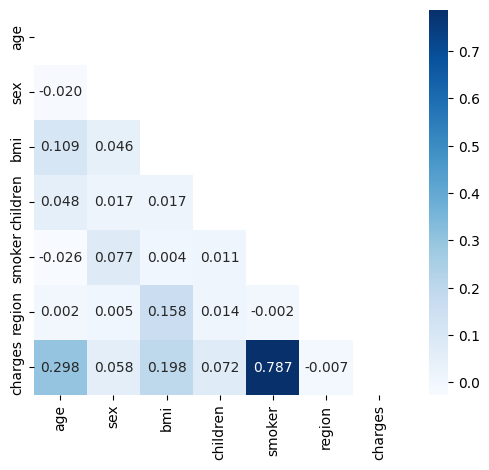

In [49]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Blues', mask=mask)
plt.show()

In [50]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.072012
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

From the correlation analysis, it is clear that there is a high positive correlation between smoker and charges.

### Separating features and target

In [51]:
x = df.drop('charges', axis=1)
y = df['charges']

#### Feature scaling

In [52]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-1.118544,1.969660,1.343163
1,-1.511647,0.990324,0.509422,0.501220,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.217560,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-1.118544,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-1.118544,-0.507702,-0.467128


### Checking Variance Inflation Factor

In [53]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,age,1.015854
1,sex,1.008882
2,bmi,1.040683
3,children,1.002998
4,smoker,1.006636
5,region,1.025891


There is no multicollinearity in the data.

### Model building

#### Splitting data into train and test

In [54]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(0, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = r2_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.7996558021172124
Random state for best accuracy: 113


In [56]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=max_rs)

#### Regression models

In [57]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost

In [58]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regressor', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('XGBoost', xgboost.XGBRegressor())
]

results = []

for model_name, model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append((model_name, mae, rmse, r2))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
df_results.sort_values('R2', ascending=False, inplace=True)

df_results

,Model,MAE,RMSE,R2
6,Gradient Boosting,2379.901524,4230.611602,0.887351
4,Random Forest,2582.125016,4490.036995,0.873112
5,Extra Trees,2632.489386,4796.219508,0.855217
9,XGBoost,2966.665431,4833.760364,0.852942
2,KNN,3319.760527,5259.157157,0.825919
0,Linear Regression,3900.021355,5641.944679,0.799656
7,Lasso,3900.072684,5642.273118,0.799632
8,Ridge,3902.242909,5643.455942,0.799548
3,Decision Tree,2849.498705,6066.726339,0.768352
1,Support Vector Regressor,8628.519356,13277.425221,-0.109550


The Gradient Boosting model seems to perform the best based on the R2 scores.

#### Cross validation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
results = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2') # Using fold value of 5
    mean_score = cv_score.mean()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    diff = abs(r2 - mean_score)
    
    results.append((model_name, mae, rmse, r2, mean_score, diff))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2', 'CV R2', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,MAE,RMSE,R2,CV R2,Difference
1,Support Vector Regressor,8628.519356,13277.425221,-0.109550,-0.095250,0.014300
2,KNN,3319.760527,5259.157157,0.825919,0.780897,0.045022
5,Extra Trees,2634.698700,4790.341373,0.855572,0.803718,0.051854
6,Gradient Boosting,2399.513635,4262.290008,0.885658,0.831778,0.053880
4,Random Forest,2624.467892,4522.490397,0.871272,0.816414,0.054858
3,Decision Tree,2877.343393,6149.770256,0.761967,0.690172,0.071795
9,XGBoost,2966.665431,4833.760364,0.852942,0.776869,0.076072
8,Ridge,3902.242909,5643.455942,0.799548,0.717695,0.081853
7,Lasso,3900.072684,5642.273118,0.799632,0.717673,0.081959
0,Linear Regression,3900.021355,5641.944679,0.799656,0.717673,0.081983


Although the difference is very low for SVR model, the R2 score is negative. This means that the model does not perform well on both training and test data. So we should not use this model. <br>

The next option with low difference between Cross Validation R2 score and Test R2 score is the KNN model. This means the KNN model is the keast overfitting model.

#### Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
params = {
    'leaf_size': list(range(1, 15)),
    'n_neighbors': list(range(1, 10)),
    'p': [1, 2]
}

In [63]:
gcv = GridSearchCV(KNeighborsRegressor(), params, cv=5, scoring='r2')
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             scoring='r2')

In [64]:
best_params = gcv.best_params_
best_params

{'leaf_size': 1, 'n_neighbors': 8, 'p': 2}

In [65]:
model = KNeighborsRegressor(**best_params)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 3243.679439381841
Root Mean Squared Error: 5113.622703254893
R2 Score: 0.8354202169760476


The final R2 score is 83.54%.

### Saving the model

In [66]:
import pickle

In [67]:
filename = 'final_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Predicting using the saved model

In [68]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [69]:
df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
df.head(25)

,Actual,Predicted
0,4949.75870,4940.880506
1,4296.27120,8043.990211
2,4518.82625,6994.478416
3,2498.41440,2145.586188
4,3238.43570,4697.275775
5,2205.98080,4957.815831
6,9182.17000,17372.001030
7,8125.78450,10701.536854
8,5124.18870,5339.274009
9,14590.63205,14466.026364


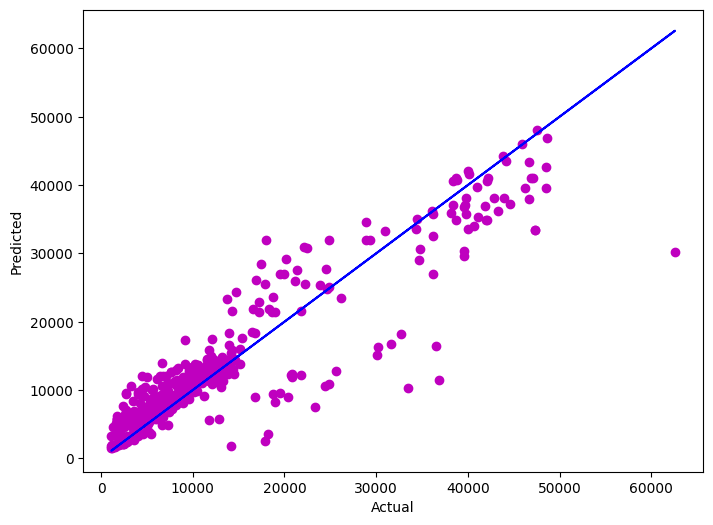

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=pred, color='m')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

These are the final predictions.